In [1]:
# Tratamento ETL
import pandas as pd
import numpy as np

# Previsão de tempo
from tqdm import tqdm
from time import sleep

# Visualização 
import seaborn as sns
import matplotlib.pyplot as plt

# Utilizado para transformar variaveis categoricas em numericas
from sklearn.preprocessing import OneHotEncoder # Matrix para modelos de regressão
from sklearn.preprocessing import OrdinalEncoder # Ordinal para modelos de arvore

# Utilizado para separar nossos dados em treino e teste
from sklearn.model_selection import train_test_split

# Utilizado para padronizar os dados
from sklearn.preprocessing import StandardScaler

# Utilizado para montar o pipeline de dados
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

# Utilizado para selecionar os melhores parametros
from sklearn.feature_selection import SelectKBest

# Utilizado para selecionar as variaveis object
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer as transformer

# Tipos de modelos de ML Regressão
from sklearn.ensemble import GradientBoostingRegressor #melhor até o momento <= 3600
from sklearn.ensemble import RandomForestRegressor #ñ
from sklearn.tree import DecisionTreeRegressor #ñ
from sklearn.neighbors import KNeighborsRegressor #ñ
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor

# Tipos de modelos de ML Classificação
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Utilizado para pesquisa de mmelhrores parametros para se treinar um modelo
from sklearn.model_selection import RandomizedSearchCV

# Utilizado para analisar o score do modelo
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Utilizado 
from sklearn.model_selection import ShuffleSplit

# Utilizado
from sklearn.compose import TransformedTargetRegressor

# Mostra a estrutura do pipeline
from sklearn import set_config
set_config(display='diagram')

# Não exibir os warnings ao treinar o modelo
import warnings
warnings.filterwarnings("ignore")

# Exibir todas as colunas no data frame
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('new_base_taxi.csv', delimiter = ',')#.sample(450000).rename_axis('lixo').reset_index()
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_duration,pickup_date,month,month_name,pickup_day,pickup_hour,pickup_day_of_week,pickup_day_of_week_num,dropoff_date,dropoff_day,dropoff_hour,dropoff_day_of_week,dropoff_day_of_week_num,year,trip_distance_km,pickup_latitude,pickup_longitude,pickup_lat_lon,dropoff_latitude,dropoff_longitude,dropoff_lat_lon
0,class_two,2016-03-14 17:24:55,2016-03-14 17:32:30,1,455.0,2016-03-14 00:00:00,3,MAR,14,17,Monday,0,2016-03-14 00:00:00,14,17,Monday,0,2016,1.499,40.767937,-73.982155,"40.76793670654297,-73.98215484619139",40.765602,-73.964630,"40.765602111816406,-73.96463012695312"
1,class_one,2016-06-12 00:43:35,2016-06-12 00:54:38,1,663.0,2016-06-12 00:00:00,6,JUN,12,0,Sunday,6,2016-06-12 00:00:00,12,0,Sunday,6,2016,1.806,40.738564,-73.980415,"40.738563537597656,-73.98041534423827",40.731152,-73.999481,"40.73115158081055,-73.99948120117188"
2,class_two,2016-01-19 11:35:24,2016-01-19 12:10:48,1,2124.0,2016-01-19 00:00:00,1,JAN,19,11,Tuesday,1,2016-01-19 00:00:00,19,12,Tuesday,1,2016,6.387,40.763939,-73.979027,"40.763938903808594,-73.97902679443358",40.710087,-74.005333,"40.71008682250977,-74.00533294677734"
3,class_two,2016-04-06 19:32:31,2016-04-06 19:39:40,1,429.0,2016-04-06 00:00:00,4,APR,6,19,Wednesday,2,2016-04-06 00:00:00,6,19,Wednesday,2,2016,1.486,40.719971,-74.010040,"40.719970703125,-74.01004028320312",40.706718,-74.012268,"40.70671844482422,-74.01226806640625"
4,class_two,2016-03-26 13:30:55,2016-03-26 13:38:10,1,435.0,2016-03-26 00:00:00,3,MAR,26,13,Saturday,5,2016-03-26 00:00:00,26,13,Saturday,5,2016,1.189,40.793209,-73.973053,"40.79320907592773,-73.97305297851562",40.782520,-73.972923,"40.78252029418945,-73.9729232788086"


---

<h2 style="color:dimgray;" align="center">Verificando e retirando os outliers</h2>

Text(0, 0.5, 'duration')

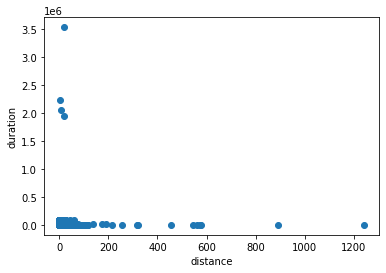

In [3]:
# Muitos outliers
plt.scatter(df.trip_distance_km, df.trip_duration )
plt.xlabel('distance')
plt.ylabel('duration')

Text(0, 0.5, 'duration')

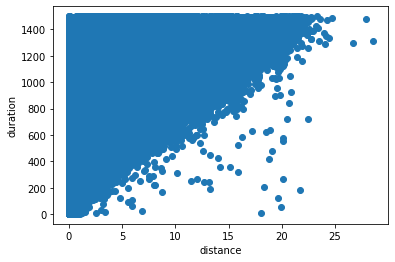

In [4]:
# Limpando esses outliers
df = df.loc[ (df['trip_distance_km'] <= 30) & (df['trip_duration'] <= 1500)]
plt.scatter(df.trip_distance_km, df.trip_duration )
plt.xlabel('distance')
plt.ylabel('duration')

---

<h2 style="color:dimgray;" align="center">Criando categorias para o data set</h2>

In [3]:
# criando categoria
conditionlist = [
    (df['trip_duration'] > 1200),
    (df['trip_duration'] > 900) & (df['trip_duration'] <= 1200),
    (df['trip_duration'] > 600) & (df['trip_duration'] <= 900),
    (df['trip_duration'] > 300) & (df['trip_duration'] <= 600),
    (df['trip_duration'] <=300)]
choicelist = ['>1200', '>900/<=1200','>600/<=900', '>300/<=600', '<=300']
df['target_cat'] = np.select(conditionlist, choicelist, default='Not Specified')

"""
from sklearn.preprocessing import OneHotEncoder
# para modelos de regressão
pickup_day_of_week_column = df[['pickup_day_of_week']]
encoder = OneHotEncoder(sparse=False)
pickup_day_of_week_encoded = encoder.fit_transform(pickup_day_of_week_column)
feature_names = encoder.get_feature_names(input_features=["day"])
pickup_day_of_week_encoded = pd.DataFrame(pickup_day_of_week_encoded, columns=feature_names)

df['day_Friday'] = pickup_day_of_week_encoded['day_Friday']
df['day_Monday'] = pickup_day_of_week_encoded['day_Monday']
df['day_Saturday'] = pickup_day_of_week_encoded['day_Saturday']
df['day_Sunday'] = pickup_day_of_week_encoded['day_Sunday']
df['day_Trursday'] = pickup_day_of_week_encoded['day_Thursday']
df['day_Tuesday'] = pickup_day_of_week_encoded['day_Tuesday']
df['day_Wednesday'] = pickup_day_of_week_encoded['day_Wednesday']

from sklearn.preprocessing import OrdinalEncoder
# para modelos de arvore
education_column = df[['pickup_day_of_week']]
encoder = OrdinalEncoder()
education_encoded = encoder.fit_transform(education_column)
df['pickup_day_of_week_tree'] = education_encoded"""


# somar as categorias pra ver a concentração dos segundos
stc=pd.DataFrame((df['target_cat']).value_counts()).reset_index()
stc0=stc['target_cat'][(stc['index'] == '>1200')].sum()
stc1=stc['target_cat'][(stc['index'] == '>900/<=1200')].sum()
stc2=stc['target_cat'][(stc['index'] == '>600/<=900')].sum()
stc3=stc['target_cat'][(stc['index'] == '>300/<=600')].sum()
stc4=stc['target_cat'][(stc['index'] == '<=300')].sum()

print(f"O dataset contém {df.shape[0]} amostras e "f"{df.shape[1]} colunas")
print(df.columns)
df.head()

O dataset contém 1458644 amostras e 26 colunas
Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_duration', 'pickup_date', 'month', 'month_name', 'pickup_day',
       'pickup_hour', 'pickup_day_of_week', 'pickup_day_of_week_num',
       'dropoff_date', 'dropoff_day', 'dropoff_hour', 'dropoff_day_of_week',
       'dropoff_day_of_week_num', 'year', 'trip_distance_km',
       'pickup_latitude', 'pickup_longitude', 'pickup_lat_lon',
       'dropoff_latitude', 'dropoff_longitude', 'dropoff_lat_lon',
       'target_cat'],
      dtype='object')


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_duration,pickup_date,month,month_name,pickup_day,pickup_hour,pickup_day_of_week,pickup_day_of_week_num,dropoff_date,dropoff_day,dropoff_hour,dropoff_day_of_week,dropoff_day_of_week_num,year,trip_distance_km,pickup_latitude,pickup_longitude,pickup_lat_lon,dropoff_latitude,dropoff_longitude,dropoff_lat_lon,target_cat
0,class_two,2016-03-14 17:24:55,2016-03-14 17:32:30,1,455.0,2016-03-14 00:00:00,3,MAR,14,17,Monday,0,2016-03-14 00:00:00,14,17,Monday,0,2016,1.499,40.767937,-73.982155,"40.76793670654297,-73.98215484619139",40.765602,-73.964630,"40.765602111816406,-73.96463012695312",>300/<=600
1,class_one,2016-06-12 00:43:35,2016-06-12 00:54:38,1,663.0,2016-06-12 00:00:00,6,JUN,12,0,Sunday,6,2016-06-12 00:00:00,12,0,Sunday,6,2016,1.806,40.738564,-73.980415,"40.738563537597656,-73.98041534423827",40.731152,-73.999481,"40.73115158081055,-73.99948120117188",>600/<=900
2,class_two,2016-01-19 11:35:24,2016-01-19 12:10:48,1,2124.0,2016-01-19 00:00:00,1,JAN,19,11,Tuesday,1,2016-01-19 00:00:00,19,12,Tuesday,1,2016,6.387,40.763939,-73.979027,"40.763938903808594,-73.97902679443358",40.710087,-74.005333,"40.71008682250977,-74.00533294677734",>1200
3,class_two,2016-04-06 19:32:31,2016-04-06 19:39:40,1,429.0,2016-04-06 00:00:00,4,APR,6,19,Wednesday,2,2016-04-06 00:00:00,6,19,Wednesday,2,2016,1.486,40.719971,-74.010040,"40.719970703125,-74.01004028320312",40.706718,-74.012268,"40.70671844482422,-74.01226806640625",>300/<=600
4,class_two,2016-03-26 13:30:55,2016-03-26 13:38:10,1,435.0,2016-03-26 00:00:00,3,MAR,26,13,Saturday,5,2016-03-26 00:00:00,26,13,Saturday,5,2016,1.189,40.793209,-73.973053,"40.79320907592773,-73.97305297851562",40.782520,-73.972923,"40.78252029418945,-73.9729232788086",>300/<=600


---

<h2 style="color:dimgray;" align="center">Vizualizando nossos dados em relação ao target</h2>

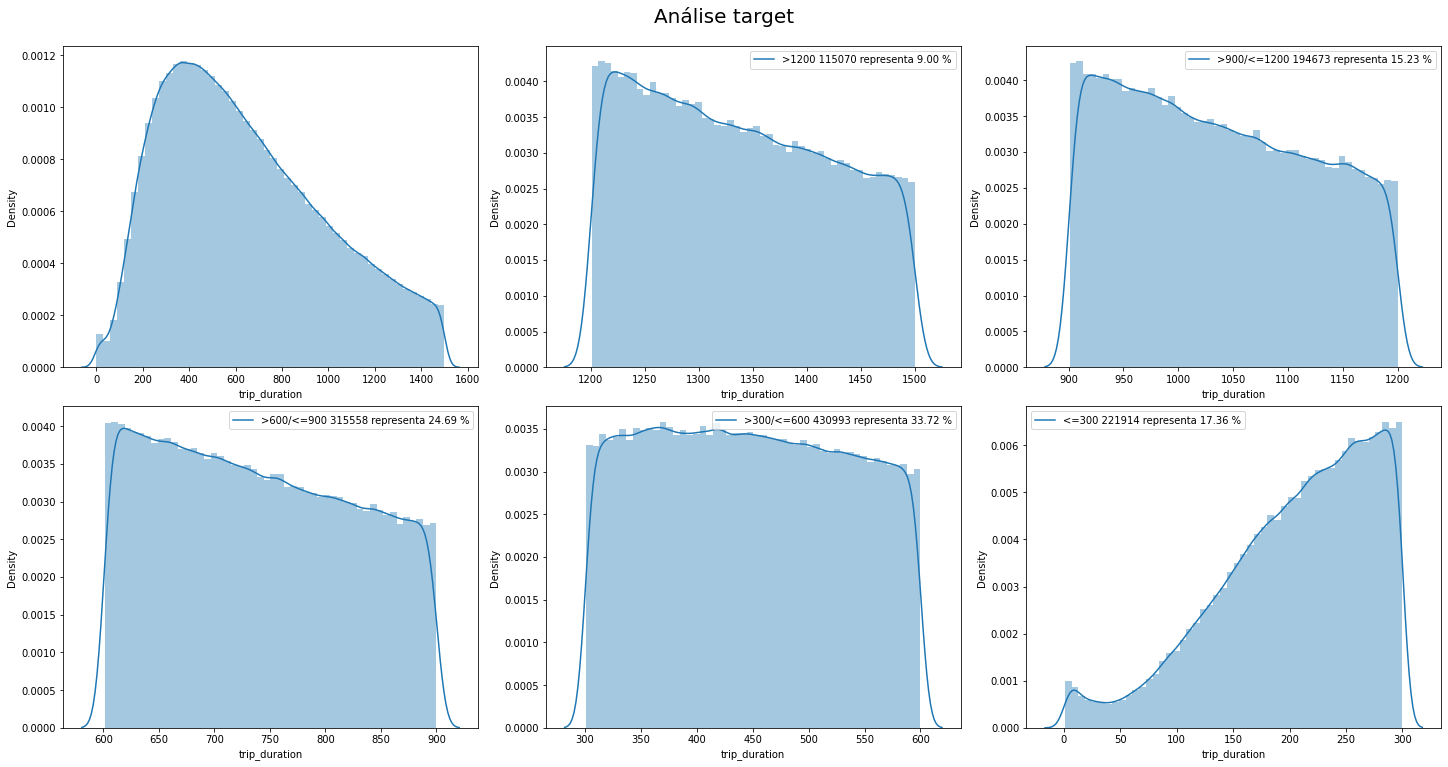

In [ ]:
fig = plt.figure(figsize=(20,10))

fig.set_constrained_layout('w_pad')

gs = fig.add_gridspec(2, 3)

ax00 = fig.add_subplot(gs[0, 0])
sns.distplot(df['trip_duration'])

ax01 = fig.add_subplot(gs[0, 1])
#sns.stripplot(x=df['target_sec'][(df['target_cat']) == '<=1800'], y=None, data=df)
sns.distplot(df['trip_duration'][(df['target_cat']) == '>1200'])
plt.legend([f'>1200 {stc0} representa {stc0/df.shape[0] * 100:.2f} %'])

ax01 = fig.add_subplot(gs[0, 2])
#sns.stripplot(x=df['target_sec'][(df['target_cat']) == '>900/<=1200'], y=None, data=df)
sns.distplot(df['trip_duration'][(df['target_cat']) == '>900/<=1200'])
plt.legend([f'>900/<=1200 {stc1} representa {stc1/df.shape[0] * 100:.2f} %'])

ax02 = fig.add_subplot(gs[1, 0])
sns.distplot(df['trip_duration'][(df['target_cat']) == '>600/<=900'])
plt.legend([f'>600/<=900 {stc2} representa {stc2/df.shape[0] * 100:.2f} %'])

ax03 = fig.add_subplot(gs[1, 1])
#sns.stripplot(x=df['target_sec'][(df['target_cat']) == '>300/<=600'], y=None, data=df)
sns.distplot(df['trip_duration'][(df['target_cat']) == '>300/<=600'])
plt.legend([f'>300/<=600 {stc3} representa {stc3/df.shape[0] * 100:.2f} %'])

ax03 = fig.add_subplot(gs[1, 2])
#sns.stripplot(x=df['target_sec'][(df['target_cat']) == '<=300'], y=None, data=df)
sns.distplot(df['trip_duration'][(df['target_cat']) == '<=300'])
plt.legend([f'<=300 {stc4} representa {stc4/df.shape[0] * 100:.2f} %'])

fig.suptitle('Análise target', fontsize=20, y=1.05)

_ = plt.show()

---

<h2 style="color:dimgray;" align="center">Separação das variaveis</h2>

In [6]:
# Separando variaveis numericas e categoricas
cat_columns_selector = selector(dtype_include=object)
cat_columns = cat_columns_selector(df)
print('Variaveis categoricas:')
print(cat_columns)
num_columns_selector = selector(dtype_include=np.number)
num_columns = num_columns_selector(df)
print('Variaveis numericas:')
print(num_columns)

Variaveis categoricas:
['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'pickup_date', 'month_name', 'pickup_day_of_week', 'dropoff_date', 'dropoff_day_of_week', 'pickup_lat_lon', 'dropoff_lat_lon', 'target_cat']
Variaveis numericas:
['passenger_count', 'trip_duration', 'month', 'pickup_day', 'pickup_hour', 'pickup_day_of_week_num', 'dropoff_day', 'dropoff_hour', 'dropoff_day_of_week_num', 'year', 'trip_distance_km', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']


---

<h2 style="color:dimgray;" align="center">Modelos de classificação</h2>

In [7]:
target_column = ['target_cat']

numerical_columns = ['passenger_count','pickup_day', 'pickup_hour', 'year', 'pickup_day_of_week_num',
                     'month', 'pickup_latitude', 'pickup_longitude', 'trip_distance_km', 'trip_duration']

categorical_columns = ['month_name','pickup_day_of_week','vendor_id']

all_columns = numerical_columns + categorical_columns + target_column 

new_df = df[all_columns]

data_numeric, target = new_df[numerical_columns + categorical_columns], new_df[target_column]

data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, target, random_state=42, test_size=0.25)

print(f"O dataset contém {new_df.shape[0]} amostras e "f"{new_df.shape[1]} colunas")

display(new_df.dtypes) 
display(new_df.head())

print(f"Number of samples in testing: {data_test.shape[0]} => "
      f"{data_test.shape[0] / data_numeric.shape[0] * 100:.1f}% of the"
      f" original set")
print(f"Number of samples in training: {data_train.shape[0]} => "
      f"{data_train.shape[0] / data_numeric.shape[0] * 100:.1f}% of the"
      f" original set")

display(data_train.head())
display(target_train.head())

O dataset contém 1278208 amostras e 14 colunas


passenger_count             int64
pickup_day                  int64
pickup_hour                 int64
year                        int64
pickup_day_of_week_num      int64
month                       int64
pickup_latitude           float64
pickup_longitude          float64
trip_distance_km          float64
trip_duration             float64
month_name                 object
pickup_day_of_week         object
vendor_id                  object
target_cat                 object
dtype: object

,passenger_count,pickup_day,pickup_hour,year,pickup_day_of_week_num,month,pickup_latitude,pickup_longitude,trip_distance_km,trip_duration,month_name,pickup_day_of_week,vendor_id,target_cat
0,1,14,17,2016,0,3,40.767937,-73.982155,1.499,455.0,MAR,Monday,class_two,>300/<=600
1,1,12,0,2016,6,6,40.738564,-73.980415,1.806,663.0,JUN,Sunday,class_one,>600/<=900
3,1,6,19,2016,2,4,40.719971,-74.010040,1.486,429.0,APR,Wednesday,class_two,>300/<=600
4,1,26,13,2016,5,3,40.793209,-73.973053,1.189,435.0,MAR,Saturday,class_two,>300/<=600
5,6,30,22,2016,5,1,40.742195,-73.982857,1.099,443.0,JAN,Saturday,class_two,>300/<=600


Number of samples in testing: 319552 => 25.0% of the original set
Number of samples in training: 958656 => 75.0% of the original set


,passenger_count,pickup_day,pickup_hour,year,pickup_day_of_week_num,month,pickup_latitude,pickup_longitude,trip_distance_km,trip_duration,month_name,pickup_day_of_week,vendor_id
1316574,1,19,7,2016,3,5,40.725620,-74.005394,5.209,1200.0,MAY,Thursday,class_one
256980,1,23,10,2016,0,5,40.763767,-73.963341,0.085,46.0,MAY,Monday,class_one
657606,6,7,16,2016,0,3,40.702812,-74.014503,6.705,1324.0,MAR,Monday,class_two
394896,2,13,22,2016,4,5,40.777222,-73.952209,4.435,1183.0,MAY,Friday,class_two
1090974,1,22,13,2016,0,2,40.734093,-74.002724,0.951,481.0,FEB,Monday,class_one


,target_cat
1316574,>900/<=1200
256980,<=300
657606,>1200
394896,>900/<=1200
1090974,>300/<=600


In [8]:
%%time
classifiers_list = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

for classifier in classifiers_list:

    trans = transformer((StandardScaler(),numerical_columns), (OneHotEncoder(),categorical_columns))
    model = make_pipeline(trans ,classifier)

    model.fit(data_train.sample(200000,random_state=0), target_train.sample(200000,random_state=0))

    cv_results = cross_val_score(model, data_test.sample(5000,random_state=0), target_test.sample(5000,random_state=0), cv=5)

    print(classifier)
    print(" %f (%f)" % (cv_results.mean(), cv_results.std()))
    print((model.predict(data_test)[:5]))
    print("model score com standar: %.3f" % model.score(data_test.sample(5000,random_state=0), target_test.sample(5000,random_state=0)))

LogisticRegression()
 0.968200 (0.006431)
['>600/<=900' '>1200' '>300/<=600' '>600/<=900' '>600/<=900']
model score com standar: 0.997
KNeighborsClassifier()
 0.561400 (0.013588)
['>600/<=900' '>1200' '>300/<=600' '>600/<=900' '>600/<=900']
model score com standar: 0.804
DecisionTreeClassifier()
 1.000000 (0.000000)
['>600/<=900' '>1200' '>300/<=600' '>600/<=900' '>600/<=900']
model score com standar: 1.000
RandomForestClassifier()
 0.998600 (0.001020)
['>600/<=900' '>1200' '>300/<=600' '>600/<=900' '>600/<=900']
model score com standar: 1.000
AdaBoostClassifier()
 0.843600 (0.000490)
['>600/<=900' '>1200' '>300/<=600' '>600/<=900' '>600/<=900']
model score com standar: 0.844
GradientBoostingClassifier()
 1.000000 (0.000000)
['>600/<=900' '>1200' '>300/<=600' '>600/<=900' '>600/<=900']
model score com standar: 1.000
Wall time: 43min 18s


In [9]:
%%time
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 2000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
trans = transformer((StandardScaler(),numerical_columns), (OneHotEncoder(),categorical_columns))
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across n different combinations, and use all available cores
rf_random = RandomizedSearchCV(
        estimator = rf,
        param_distributions = random_grid, 
        n_iter = 15, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(trans.fit_transform(data_train.sample(200000,random_state=0)), target_train.sample(200000,random_state=0))

print(rf_random.best_params_)

columns = [f"param_{name}" for name in random_grid.keys()]
columns += ["mean_test_error", "std_test_error"]
cv_results = pd.DataFrame(rf_random.cv_results_)
cv_results["mean_test_error"] = -cv_results["mean_test_score"]
cv_results["std_test_error"] = cv_results["std_test_score"]
cv_results[columns].sort_values(by="mean_test_error")

{'n_estimators': [1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1101, 1111, 1121, 1131, 1141, 1151, 1161, 1171, 1181, 1191, 1202, 1212, 1222, 1232, 1242, 1252, 1262, 1272, 1282, 1292, 1303, 1313, 1323, 1333, 1343, 1353, 1363, 1373, 1383, 1393, 1404, 1414, 1424, 1434, 1444, 1454, 1464, 1474, 1484, 1494, 1505, 1515, 1525, 1535, 1545, 1555, 1565, 1575, 1585, 1595, 1606, 1616, 1626, 1636, 1646, 1656, 1666, 1676, 1686, 1696, 1707, 1717, 1727, 1737, 1747, 1757, 1767, 1777, 1787, 1797, 1808, 1818, 1828, 1838, 1848, 1858, 1868, 1878, 1888, 1898, 1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 72.8min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 195.0min finished


{'n_estimators': 1909, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30}
Wall time: 3h 23min 48s


,param_n_estimators,param_max_features,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_test_error,std_test_error
2,1909,sqrt,30,10,4,-1.000000,0.00000
3,1757,sqrt,None,10,4,-1.000000,0.00000
4,1646,sqrt,70,10,1,-1.000000,0.00000
6,1656,auto,40,10,4,-1.000000,0.00000
7,1505,auto,100,2,4,-1.000000,0.00000
8,1262,auto,30,10,4,-1.000000,0.00000
10,1636,auto,70,10,2,-1.000000,0.00000
11,1232,sqrt,90,5,4,-1.000000,0.00000
12,1222,sqrt,50,10,1,-1.000000,0.00000
0,1959,sqrt,90,5,2,-0.999995,0.00001


In [10]:
%%time
trans = transformer((StandardScaler(),numerical_columns), (OneHotEncoder(),categorical_columns))

model = make_pipeline(trans , RandomForestClassifier(n_estimators=1909, min_samples_split=10, 
                                                     min_samples_leaf=4, max_features='sqrt', max_depth=30))
display(model)
_ = model.fit(data_train.sample(450000,random_state=0), target_train.sample(450000,random_state=0))
#display(cross_val_score(model, data_test, target_test, cv=5))
display(model.predict(data_test)[:5])
display(model.score(data_test, target_test))

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['passenger_count',
                                                   'pickup_day', 'pickup_hour',
                                                   'year',
                                                   'pickup_day_of_week_num',
                                                   'month', 'pickup_latitude',
                                                   'pickup_longitude',
                                                   'trip_distance_km',
                                                   'trip_duration']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['month_name',
                                                   'pickup_day_of_week',
                                                   'vendor_id'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=30, max_features='sqrt',
                                        min_samples_leaf=4,
                                        min_samples_split=10,
                                        n_estimators=1909))])

array(['>600/<=900', '>1200', '>300/<=600', '>600/<=900', '>600/<=900'],
      dtype=object)

1.0

Wall time: 59min 43s


---

<h2 style="color:dimgray;" align="center">Modelos de regressão</h2>

In [4]:
target_column = ['trip_duration']

numerical_columns = ['passenger_count','pickup_day', 'pickup_hour', 'year', 'pickup_day_of_week_num',
                     'month', 'pickup_latitude', 'pickup_longitude','trip_distance_km']

categorical_columns = ['month_name','pickup_day_of_week','vendor_id','target_cat']


all_columns = numerical_columns + categorical_columns + target_column 

new_df = df[all_columns]

data_numeric, target = new_df[numerical_columns + categorical_columns], new_df[target_column]

data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, target, random_state=42, test_size=0.25)

print(f"O dataset contém {new_df.shape[0]} amostras e "f"{new_df.shape[1]} colunas")

display(new_df.dtypes) 
display(new_df.head())

print(f"Number of samples in testing: {data_test.shape[0]} => "
      f"{data_test.shape[0] / data_numeric.shape[0] * 100:.1f}% of the"
      f" original set")
print(f"Number of samples in training: {data_train.shape[0]} => "
      f"{data_train.shape[0] / data_numeric.shape[0] * 100:.1f}% of the"
      f" original set")

display(data_train.head())
display(target_train.head())

O dataset contém 1458644 amostras e 14 colunas


passenger_count             int64
pickup_day                  int64
pickup_hour                 int64
year                        int64
pickup_day_of_week_num      int64
month                       int64
pickup_latitude           float64
pickup_longitude          float64
trip_distance_km          float64
month_name                 object
pickup_day_of_week         object
vendor_id                  object
target_cat                 object
trip_duration             float64
dtype: object

,passenger_count,pickup_day,pickup_hour,year,pickup_day_of_week_num,month,pickup_latitude,pickup_longitude,trip_distance_km,month_name,pickup_day_of_week,vendor_id,target_cat,trip_duration
0,1,14,17,2016,0,3,40.767937,-73.982155,1.499,MAR,Monday,class_two,>300/<=600,455.0
1,1,12,0,2016,6,6,40.738564,-73.980415,1.806,JUN,Sunday,class_one,>600/<=900,663.0
2,1,19,11,2016,1,1,40.763939,-73.979027,6.387,JAN,Tuesday,class_two,>1200,2124.0
3,1,6,19,2016,2,4,40.719971,-74.010040,1.486,APR,Wednesday,class_two,>300/<=600,429.0
4,1,26,13,2016,5,3,40.793209,-73.973053,1.189,MAR,Saturday,class_two,>300/<=600,435.0


Number of samples in testing: 364661 => 25.0% of the original set
Number of samples in training: 1093983 => 75.0% of the original set


,passenger_count,pickup_day,pickup_hour,year,pickup_day_of_week_num,month,pickup_latitude,pickup_longitude,trip_distance_km,month_name,pickup_day_of_week,vendor_id,target_cat
1074586,1,12,1,2016,3,5,40.744423,-73.994102,2.025,MAY,Thursday,class_one,>300/<=600
1033070,1,25,9,2016,0,4,40.766834,-73.990944,3.307,APR,Monday,class_one,>900/<=1200
376035,1,31,8,2016,1,5,40.773609,-73.870552,9.429,MAY,Tuesday,class_two,>1200
1180381,1,9,11,2016,2,3,40.781597,-73.958435,3.002,MAR,Wednesday,class_two,>600/<=900
1130868,3,17,21,2016,6,1,40.645306,-73.776627,6.976,JAN,Sunday,class_one,>1200


,trip_duration
1074586,438.0
1033070,1050.0
376035,2769.0
1180381,732.0
1130868,1442.0


In [ ]:
%%time
'''
A função de perda mede o quão longe o modelo está de seu objetivo

A perda de log procura calcular o quão incerto seu modelo é sobre as previsões que está gerando.

A precisão do modelo é a fração de previsões que um modelo acerta.

Erro absoluto médio (MAE): 
Isso é medido tomando a média da diferença absoluta entre os valores reais e as previsões. Idealmente, essa diferença é mínima.

Erro quadrático médio (RMSE): 
Este é um MAE semelhante, mas adota uma abordagem ligeiramente modificada para que valores com grande erro recebam uma penalidade mais alta. 
O RMSE obtém a raiz quadrada da diferença quadrática média entre a previsão e o valor real.

Coeficiente de determinação ou R-quadrado (R^2): 
mede o quanto os resultados bem observados são realmente previstos pelo modelo, com base na proporção da variação total dos resultados.
'''

classifiers_list = [
    LogisticRegression(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor()
]

for classifier in classifiers_list:

    trans = transformer((StandardScaler(),numerical_columns), (OneHotEncoder(),categorical_columns))
    model = make_pipeline(trans ,classifier)
    #cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=42)

    model.fit(data_train.sample(200000,random_state=0), target_train.sample(200000,random_state=0))

    cv_results = cross_val_score(model, data_test.sample(5000,random_state=0), target_test.sample(5000,random_state=0), cv=5)

    print(classifier)
    print(" %f (%f)" % (cv_results.mean(), cv_results.std()))
    print((model.predict(data_test.sample(5000,random_state=0))[:5]))
    print("model score com standar: %.3f" % model.score(data_test.sample(5000,random_state=0), target_test.sample(5000,random_state=0)))

In [5]:
%%time
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 2000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
trans = transformer((StandardScaler(),numerical_columns), (OneHotEncoder(),categorical_columns))
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across n different combinations, and use all available cores
rf_random = RandomizedSearchCV(
        estimator = rf,
        param_distributions = random_grid, 
        n_iter = 15, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(trans.fit_transform(data_train.sample(100000,random_state=0)), target_train.sample(100000,random_state=0))

print(rf_random.best_params_)

columns = [f"param_{name}" for name in random_grid.keys()]
columns += ["mean_test_error", "std_test_error"]
cv_results = pd.DataFrame(rf_random.cv_results_)
cv_results["mean_test_error"] = -cv_results["mean_test_score"]
cv_results["std_test_error"] = cv_results["std_test_score"]
cv_results[columns].sort_values(by="mean_test_error")

{'n_estimators': [1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1101, 1111, 1121, 1131, 1141, 1151, 1161, 1171, 1181, 1191, 1202, 1212, 1222, 1232, 1242, 1252, 1262, 1272, 1282, 1292, 1303, 1313, 1323, 1333, 1343, 1353, 1363, 1373, 1383, 1393, 1404, 1414, 1424, 1434, 1444, 1454, 1464, 1474, 1484, 1494, 1505, 1515, 1525, 1535, 1545, 1555, 1565, 1575, 1585, 1595, 1606, 1616, 1626, 1636, 1646, 1656, 1666, 1676, 1686, 1696, 1707, 1717, 1727, 1737, 1747, 1757, 1767, 1777, 1787, 1797, 1808, 1818, 1828, 1838, 1848, 1858, 1868, 1878, 1888, 1898, 1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 49.1min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 208.3min finished


{'n_estimators': 1757, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}
Wall time: 3h 33min 26s


,param_n_estimators,param_max_features,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_test_error,std_test_error
3,1757,sqrt,None,10,4,-0.096044,0.017269
11,1232,sqrt,90,5,4,-0.095820,0.017610
13,1858,sqrt,10,5,4,-0.095589,0.015906
2,1909,sqrt,30,10,4,-0.094881,0.016079
4,1646,sqrt,70,10,1,-0.091277,0.015737
12,1222,sqrt,50,10,1,-0.090170,0.017095
1,1606,auto,10,10,4,-0.076343,0.007371
14,1696,auto,10,5,4,-0.076141,0.007490
8,1262,auto,30,10,4,-0.070720,0.005135
6,1656,auto,40,10,4,-0.069638,0.008548


In [ ]:
%%time
trans = transformer((StandardScaler(),numerical_columns), (OneHotEncoder(),categorical_columns))

model = make_pipeline(trans , RandomForestClassifier(n_estimators=1909, min_samples_split=10, 
                                                     min_samples_leaf=4, max_features='sqrt', max_depth=30))
display(model)
_ = model.fit(data_train.sample(450000,random_state=0), target_train.sample(450000,random_state=0))
#display(cross_val_score(model, data_test, target_test, cv=5))
display(model.predict(data_test)[:5])
display(model.score(data_test, target_test))

In [6]:
%%time
trans = transformer(
      (StandardScaler(),numerical_columns),
      (OneHotEncoder(),categorical_columns))

regr_trans = TransformedTargetRegressor(regressor=RandomForestRegressor(), func=np.log1p, inverse_func=np.expm1)

model_gradient = make_pipeline(trans, RandomForestRegressor(n_estimators=1909, min_samples_split=10, 
                                                     min_samples_leaf=4, max_features='sqrt', max_depth=30))

display(model_gradient)
model_gradient.fit(data_train, target_train)

# faz ele vai testar aliatoriamente 30% do fold com 40 amostras 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py 
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=0)

#data_numeric, target
cv_result = pd.DataFrame(cross_validate(model_gradient, data_test, target_test, cv=cv, scoring="neg_mean_absolute_error", return_train_score=True, n_jobs=2))
display(model_gradient.predict(data_test)[:5])
display(model_gradient.score(data_test, target_test))
scores = cv_result["test_score"]
print("The mean cross-validation accuracy is: " f"{scores.mean():.3f} +/- {scores.std():.3f}")
cv_result.head()

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['passenger_count',
                                                   'pickup_day', 'pickup_hour',
                                                   'year',
                                                   'pickup_day_of_week_num',
                                                   'month', 'pickup_latitude',
                                                   'pickup_longitude',
                                                   'trip_distance_km']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['month_name',
                                                   'pickup_day_of_week',
                                                   'vendor_id',
                                                   'target_cat'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=30, max_features='sqrt',
                                       min_samples_leaf=4, min_samples_split=10,
                                       n_estimators=1909))])

array([1012.25599832,  725.41692594,  778.9501826 ,  745.49350528,
       3840.44726346])

0.09999268845729448

The mean cross-validation accuracy is: nan +/- nan
Wall time: 59min 50s


,fit_time,score_time,test_score,train_score
0,184.429775,0.0,NaN,NaN
1,184.599676,0.0,NaN,NaN
2,348.822715,0.0,NaN,NaN
3,162.721844,0.0,NaN,NaN
4,81.243469,0.0,NaN,NaN


In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_gradient, data_numeric, target)
scores

array([0.52215916, 0.51400574, 0.5016037 , 0.5076449 , 0.49916304])

In [20]:
cv_result["test_error"] = -cv_result["test_score"]
cv_result.head()

,fit_time,score_time,test_score,train_score,test_error
0,489.111292,32.988633,-283.276486,-161.785261,283.276486
1,486.397116,28.869754,-306.766254,-155.053615,306.766254
2,450.634317,6.711709,-294.604349,-161.439261,294.604349
3,448.707170,6.677781,-302.328621,-157.150829,302.328621
4,418.848348,9.801952,-299.314152,-157.609215,299.314152


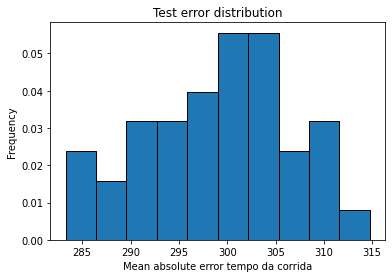

In [21]:
cv_result["test_error"].plot.hist(bins=10, edgecolor="black", density=True)
plt.xlabel("Mean absolute error tempo da corrida")
_ = plt.title("Test error distribution")

In [16]:
print(f"The mean cross-validated testing error is: "
      f"{cv_result['test_error'].mean():.2f} segundos")
print(f"The standard deviation of the testing error is: "
      f"{cv_result['test_error'].std():.2f} segundos")

The mean cross-validated testing error is: 299.04 segundos
The standard deviation of the testing error is: 7.68 segundos


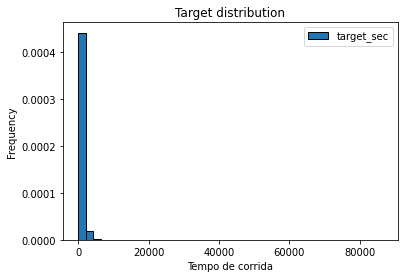

In [22]:
target.plot.hist(bins=40, edgecolor="black", density=True)
plt.xlabel("Tempo de corrida")
_ = plt.title("Target distribution")

In [18]:
print(f"O standard deviation do alvo é: {target['target_sec'].std():.2f} segundos")

O standard deviation do alvo é: 3172.88 segundos


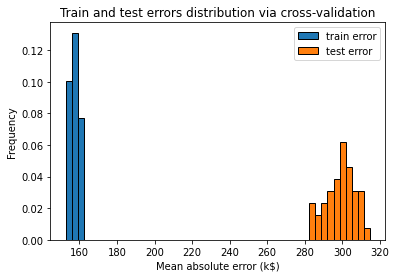

In [19]:
scores = pd.DataFrame()
scores[["train error", "test error"]] = -cv_result[["train_score", "test_score"]]
scores.plot.hist(bins=50, edgecolor="black", density=True)
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Train and test errors distribution via cross-validation")